In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data =pd.read_csv('Skydata_pro.csv')

* import required Libraries

In [3]:
data.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237658e+18,122.472536,29.477546,18.80104,18.79409,19.17904,19.46893,19.62121,2830.0,301.0,1.0,82.0,5.011614e+18,STAR,0.000113,4451.0,55537.0,848.0
1,1.237661e+18,157.220491,38.044462,19.21634,17.36450,16.39222,15.96160,15.62490,3647.0,301.0,1.0,123.0,1.607801e+18,GALAXY,0.107083,1428.0,52998.0,56.0
2,1.237665e+18,128.426499,22.244187,17.58285,16.66683,16.37511,16.23573,16.03283,4517.0,301.0,2.0,113.0,2.171901e+18,GALAXY,0.024777,1929.0,53349.0,144.0
3,1.237655e+18,148.311910,3.603649,19.49339,18.02611,17.21924,16.73868,16.43414,2125.0,301.0,3.0,197.0,6.429279e+17,GALAXY,0.091564,571.0,52286.0,142.0
4,1.237649e+18,188.615906,0.966501,19.11787,18.80892,18.65386,18.43037,18.44886,752.0,301.0,6.0,301.0,3.266113e+17,QSO,1.528742,290.0,51941.0,365.0


* Exploratory Data Analysis

In [4]:
# In Sky data we have 18 cloumns and 105000 rows
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   objid      104529 non-null  float64
 1   ra         104497 non-null  float64
 2   dec        104486 non-null  float64
 3   u          104547 non-null  float64
 4   g          104502 non-null  float64
 5   r          104464 non-null  float64
 6   i          104494 non-null  float64
 7   z          104482 non-null  float64
 8   run        104492 non-null  float64
 9   rerun      104461 non-null  float64
 10  camcol     104504 non-null  float64
 11  field      104524 non-null  float64
 12  specobjid  104502 non-null  float64
 13  class      105000 non-null  object 
 14  redshift   104483 non-null  float64
 15  plate      104490 non-null  float64
 16  mjd        104497 non-null  float64
 17  fiberid    104483 non-null  float64
dtypes: float64(17), object(1)
memory usage: 14.4+ MB


In [5]:
data.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.045290e+05,104497.000000,104486.000000,104547.000000,104502.000000,104464.000000,104494.000000,104482.000000,104492.000000,104461.0,104504.000000,104524.000000,1.045020e+05,104483.000000,104490.000000,104497.000000,104483.000000
mean,1.237663e+18,177.363628,25.077019,18.646125,17.446461,16.933422,16.682464,16.527226,3987.288836,301.0,3.274353,187.085808,2.968232e+18,0.202460,2636.854560,53943.284908,343.309629
std,7.297187e+12,78.323752,20.549558,0.828695,1.003252,1.158455,1.236730,1.308751,1698.666908,0.0,1.620961,140.884349,2.552332e+18,0.484099,2268.470352,1575.078088,218.462647
min,1.237646e+18,0.013061,-19.495456,10.611810,9.668339,9.005167,8.848403,8.947795,109.000000,301.0,1.000000,11.000000,2.994897e+17,-0.004136,266.000000,51608.000000,1.000000
25%,1.237658e+18,136.207329,6.796899,18.226545,16.876755,16.220455,15.889685,15.648400,2826.000000,301.0,2.000000,85.000000,1.339867e+18,0.000007,1190.000000,52734.000000,161.000000
50%,1.237662e+18,180.315466,23.976166,18.881530,17.543095,16.934460,16.646070,16.479285,3903.000000,301.0,3.000000,153.000000,2.367808e+18,0.048396,2103.000000,53734.000000,328.000000
75%,1.237667e+18,224.385600,40.356285,19.278400,18.099840,17.648455,17.416190,17.320373,5061.000000,301.0,5.000000,249.000000,3.309106e+18,0.101922,2939.000000,54613.000000,504.000000
max,1.237681e+18,359.999615,84.490494,19.599950,19.996050,31.990100,32.141470,29.383740,8162.000000,301.0,6.000000,982.000000,1.317645e+19,7.011245,11703.000000,58543.000000,1000.000000


In [6]:
data['class'].value_counts()

GALAXY    51323
STAR      39296
QSO       14381
Name: class, dtype: int64

*Variables description:*

objid = Object Identifier

ra = J2000 Right Ascension (r-band)

dec = J2000 Declination (r-band)

u = better of deV/Exp magnitude fit (u-band)

g = better of deV/Exp magnitude fit (g-band)

r = better of deV/Exp magnitude fit (r-band)

i = better of deV/Exp magnitude fit (i-band)

z = better of deV/Exp magnitude fit (z-band)

run = Run Number

rerun = Rerun Number

camcol = Camera column

field = Field number

specobjid = Object Identifier

redshift = Final Redshift

plate = plate number

mjd = MJD of observation

fiberid = fiberID

class = object class (galaxy, star, qos [Quasi-Stellar Objects])

 *Our target column is *Class* that contain three values : *GALAXY* , *STAR* , *QOS*.*

 * We need to select features that are probably not going to be indentified with the target variable *Class* 

        -objid,specobjid and fiberid are only representing the IDs.Along these lines we won't need them for classification as they are not identified with the result.

       - Significantly more: The features 'run', 'rerun', 'camcol' and 'field' are values which describe portions of the camera right when mentioning the objective fact, for example 'run' speaks to the comparing check which caught the oject.

In [7]:
data.drop(['objid','run','rerun','camcol','field','specobjid','fiberid'] , axis = 1 , inplace=True)

In [8]:
data.head()

,ra,dec,u,g,r,i,z,class,redshift,plate,mjd
0,122.472536,29.477546,18.80104,18.79409,19.17904,19.46893,19.62121,STAR,0.000113,4451.0,55537.0
1,157.220491,38.044462,19.21634,17.36450,16.39222,15.96160,15.62490,GALAXY,0.107083,1428.0,52998.0
2,128.426499,22.244187,17.58285,16.66683,16.37511,16.23573,16.03283,GALAXY,0.024777,1929.0,53349.0
3,148.311910,3.603649,19.49339,18.02611,17.21924,16.73868,16.43414,GALAXY,0.091564,571.0,52286.0
4,188.615906,0.966501,19.11787,18.80892,18.65386,18.43037,18.44886,QSO,1.528742,290.0,51941.0


* Check null values in *data*

In [15]:
data.isnull().sum()

ra          503
dec         514
u           453
g           498
r           536
i           506
z           518
class         0
redshift    517
plate       510
mjd         503
dtype: int64

* Data Visualization

<AxesSubplot:xlabel='class', ylabel='count'>

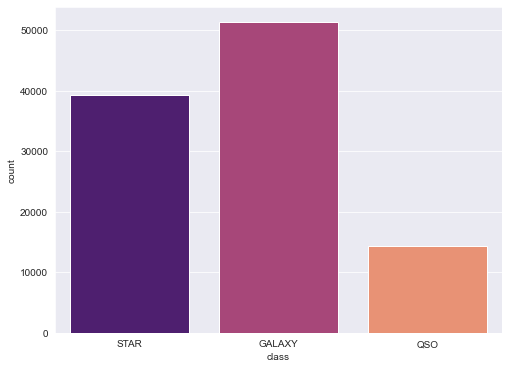

In [10]:
sns.set_style('darkgrid')
plt.figure(figsize = (8, 6))
sns.countplot(data['class'], palette = 'magma')

<AxesSubplot:>

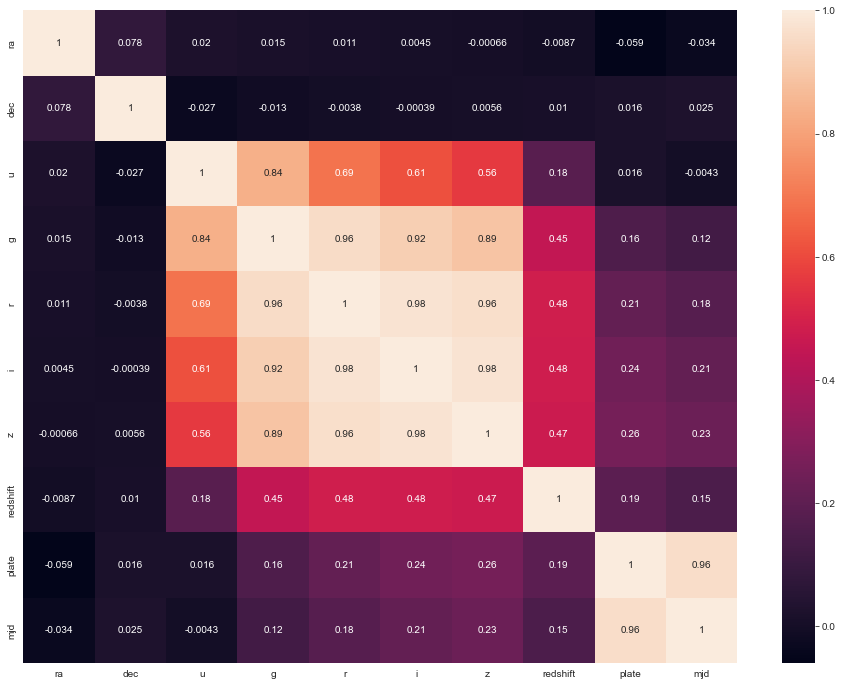

In [11]:
plt.figure(figsize = (16, 12))
sns.heatmap(data.corr(),annot=True)

* Feature Engineering

    - In this data we have to deal with missing value  by dropping them (we can drop missing values because their percentage is small comparing to the data total 5058 of 105000).
    
    - But I will use a pipline  that fill the missing values by the median using SimpleImputer, and Scale the values in columns using MinMaxScaler.

In [16]:
sum(data.isnull().sum())

5058

* Define X and y
* Split the data into training and testing data


In [35]:
X = data.drop('class',axis=1)
y = data['class']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

* Define the data columns in a list 
* Create the pipeline and the ColumnTransformer
* Fit and transform on X_train (train data)
* transform X_test (test data)

In [81]:
numeric_columns = list(X_train.columns)
numeric_columns


['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'redshift', 'plate', 'mjd']

In [83]:
numerical_pipeline = Pipeline(steps=[("min_max_scaler", MinMaxScaler()),
                                     ('num_imputer',SimpleImputer(strategy='median'))])

In [84]:
column_transformer = ColumnTransformer([
    ('numeric_transformer', numerical_pipeline, numeric_columns)
    ])

In [85]:
X_train_new = column_transformer.fit_transform(X_train)

In [86]:

sum(np.isnan(X_train_new))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [87]:
X_test_new = column_transformer.transform(X_test)

* Train the model 

In [91]:
rf = RandomForestClassifier()
rf.fit(X_train_new, y_train)
y_pred = rf.predict(X_test_new)
print('Classification Report: \n', classification_report(y_test, y_pred))
#print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
rf_train_acc = rf.score(X_train_new, y_train)
print('Training Score: ', rf_train_acc)
rf_test_acc = rf.score(X_test_new, y_test)
print('Testing Score: ', rf_test_acc)

Classification Report: 
               precision    recall  f1-score   support

      GALAXY       0.99      0.99      0.99     15304
         QSO       0.98      0.96      0.97      4336
        STAR       0.99      1.00      0.99     11860

    accuracy                           0.99     31500
   macro avg       0.99      0.98      0.99     31500
weighted avg       0.99      0.99      0.99     31500

Training Score:  0.9999591836734694
Testing Score:  0.9886666666666667


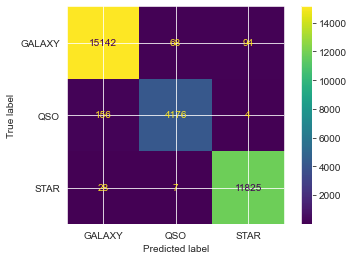

In [92]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize=None)

In [93]:
import pickle

filename = 'randomForest.pkl'
pickle.dump(rf, open(filename, "wb"))


In [94]:
pd.read_pickle('randomForest.pkl')

RandomForestClassifier()